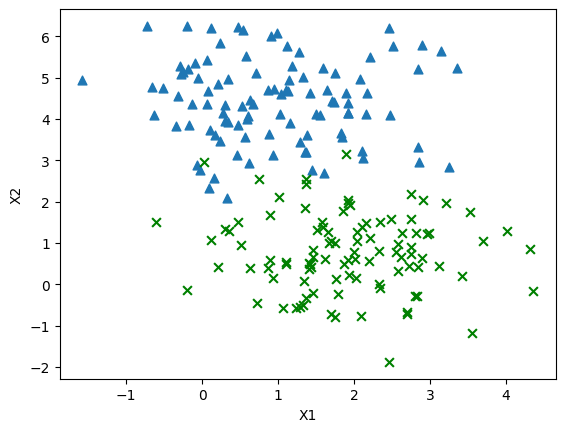

In [1]:
# Importación de librerías
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import seaborn as sns
from mglearn.plots import plot_2d_separator
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve
%matplotlib inline

# Se genera un dataset sintético
X, y = make_blobs(centers=2, random_state=0, n_samples=200)
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=40, label="Clase Y=0", marker="^")
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=40, label="Clase Y=1", c="green", marker="x")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [2]:
# División del dataset en train + test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                random_state=1234, stratify=y)
print(u'Dimensiones en train \n-X:{}\n-Y:{}'.format(X_train.shape, y_train.shape))
print(u'Dimensiones en test \n-X:{}\n-Y:{}'.format(X_test.shape, y_test.shape))

# Ajuste de una regresión logística a train
clf = LogisticRegression()
clf.fit(X_train, y_train)
print(u'Parámetros de la logística \n- Interceptor: {}\
        \n- Coeficientes: {}'.format(clf.intercept_, clf.coef_))

# Predicción del conjunto de test
y_test_pred = clf.predict(X_test)
y_test_prob = clf.predict_proba(X_test)
print(u'Ejemplo de predicción: {}'.format(y_test_prob[:1]))

Dimensiones en train 
-X:(150, 2)
-Y:(150,)
Dimensiones en test 
-X:(50, 2)
-Y:(50,)
Parámetros de la logística 
- Interceptor: [5.14609874]        
- Coeficientes: [[ 0.89634307 -2.62074832]]
Ejemplo de predicción: [[0.01425345 0.98574655]]


- Precision: 0.96
- Recall: 0.88
- Fscore: 0.92
- AUC: 0.99


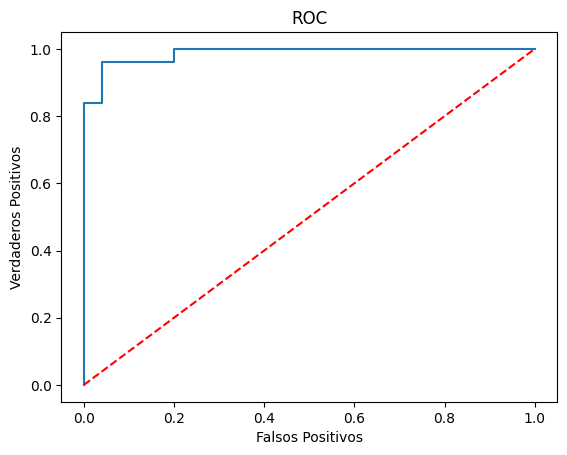

In [3]:
# Obtención de métricas
auc = roc_auc_score(y_test, y_test_prob[:, 1])
print("- Precision:", round(precision_score(y_test, y_test_pred),2))
print("- Recall:", recall_score(y_test, y_test_pred))
print("- Fscore:", round(f1_score(y_test, y_test_pred),2))
print("- AUC:", round(auc,2))

# Representación de la ROC
fpr, tpr, thrs = roc_curve(y_test, y_test_prob[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], "r--")
plt.title("ROC")
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.show()

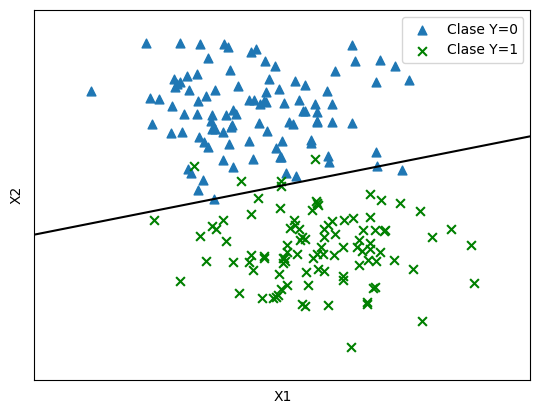

In [4]:
# Representación de la frontera de decisión
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=40, label="Clase Y=0", marker="^")
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=40, label="Clase Y=1", c="green", marker="x")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(loc="best")
plot_2d_separator(clf, X)
plt.show()